DATA ANALYSIS FOR HIV PREVENTION IN KENYAN ADOLESCENTS
Dataset loaded successfully
Shape: 469 rows, 8 columns

=== DATA QUALITY ASSESSMENT ===
Missing values per column:
Country            0
Indicator          0
Year               0
Sex                0
Age                0
DISAGG_CATEGORY    0
DISAGG             0
Value              0
dtype: int64

Indicator breakdown:
• Comprehensive knowledge records: 189
• HIV testing records: 160
• Testing site knowledge records: 120

COMPREHENSIVE HIV KNOWLEDGE ANALYSIS


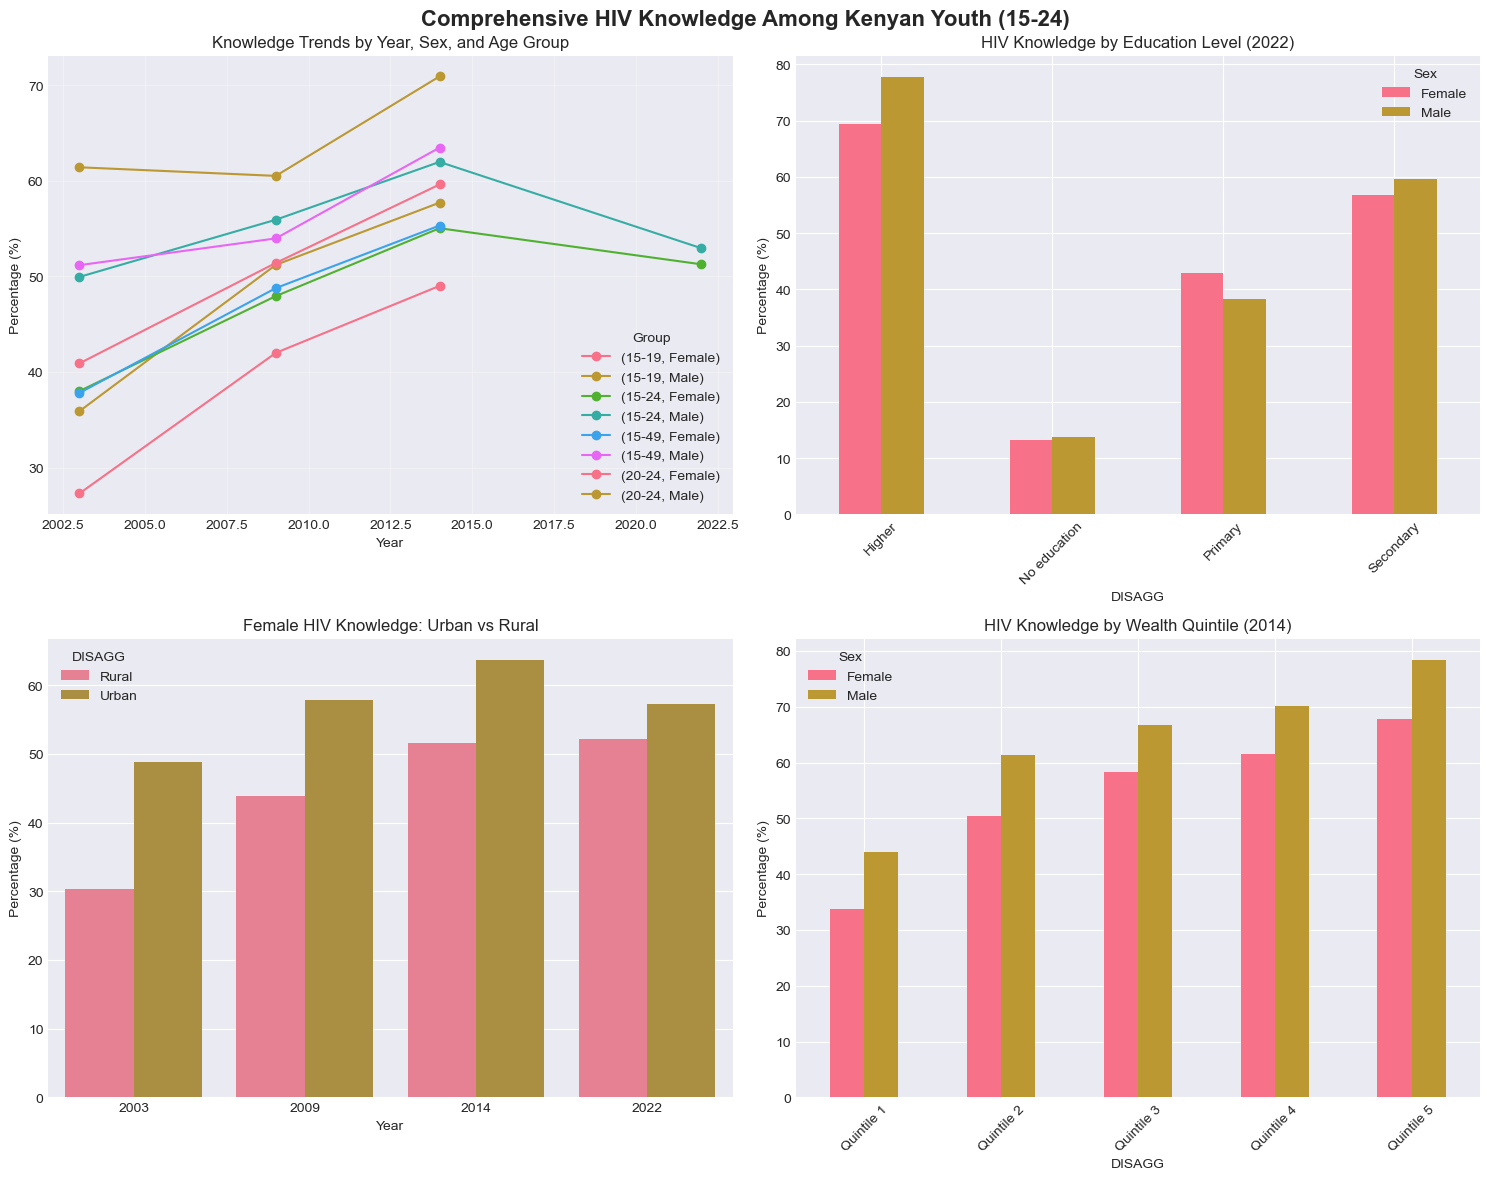


HIV TESTING BEHAVIOR ANALYSIS


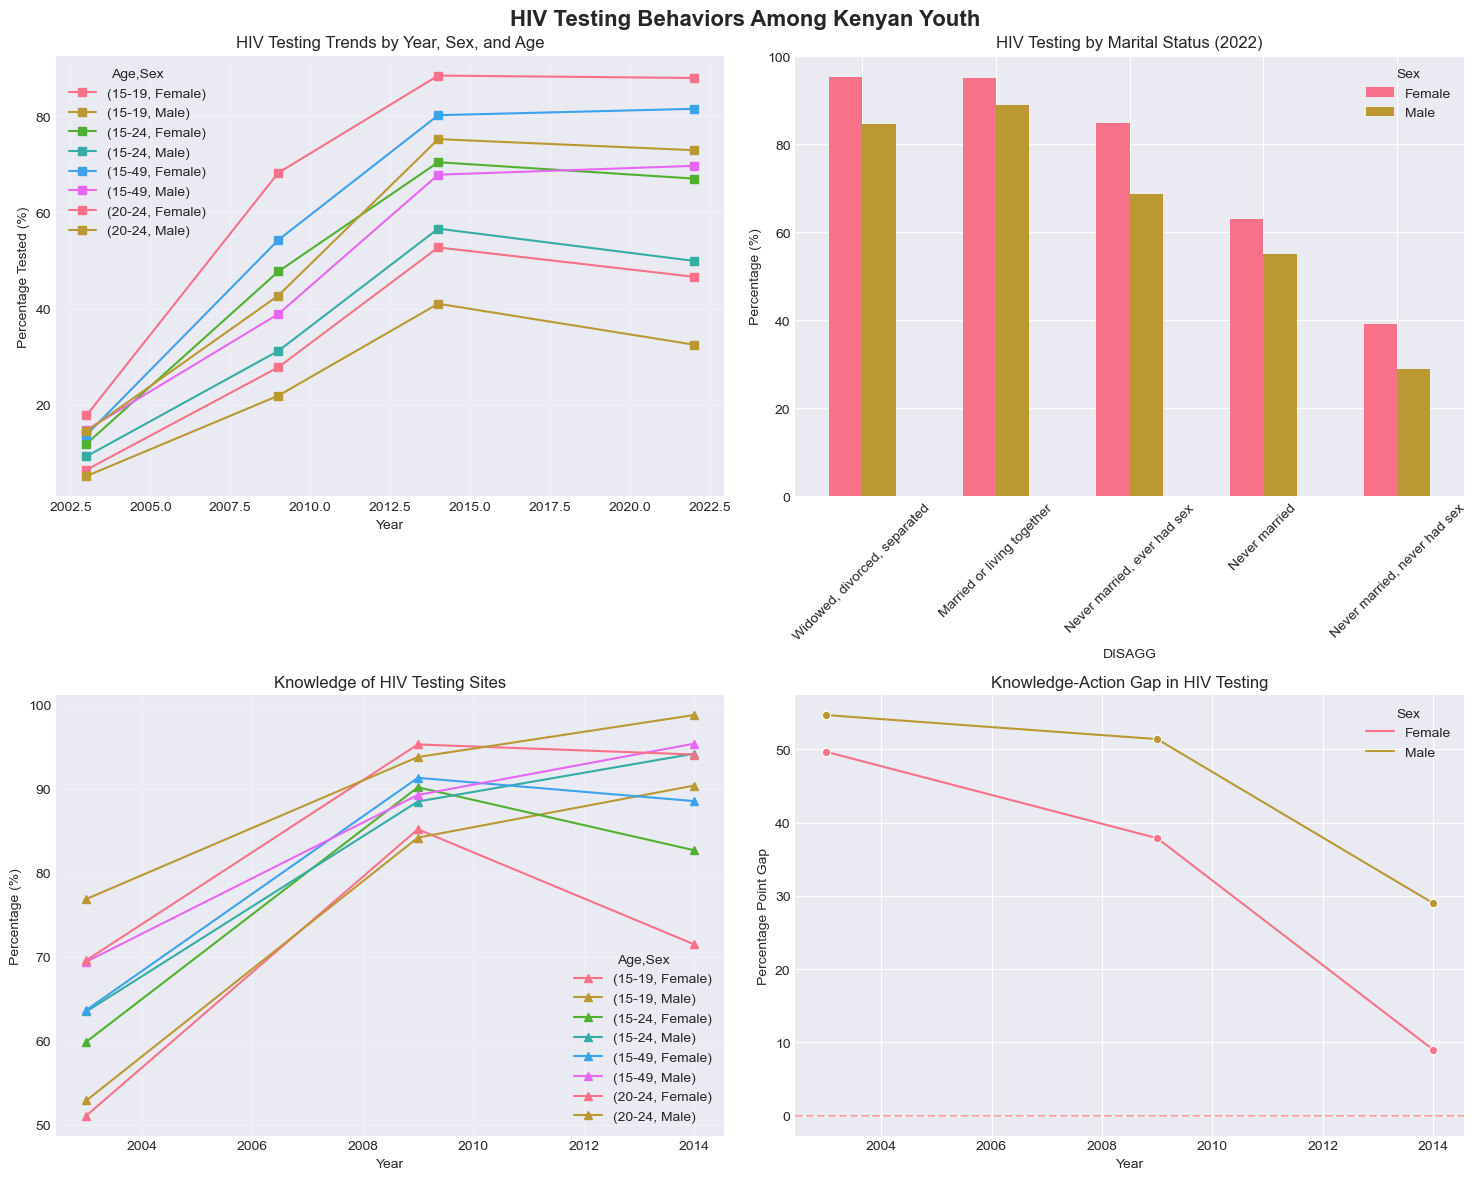


EQUITY ANALYSIS ACROSS DIMENSIONS


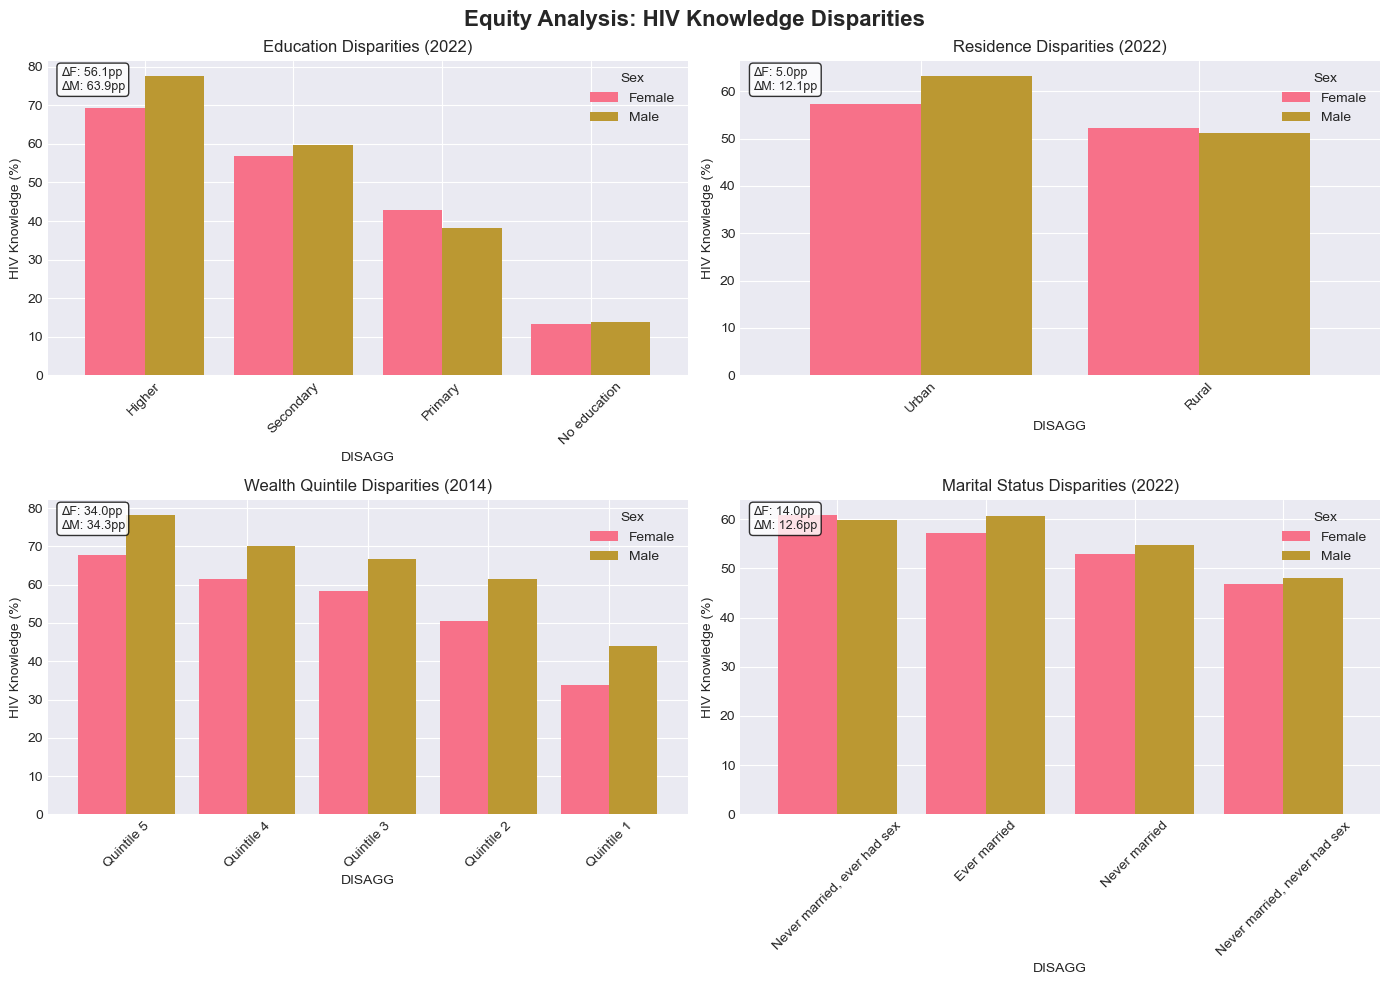


CORRELATION AND PREDICTIVE ANALYSIS


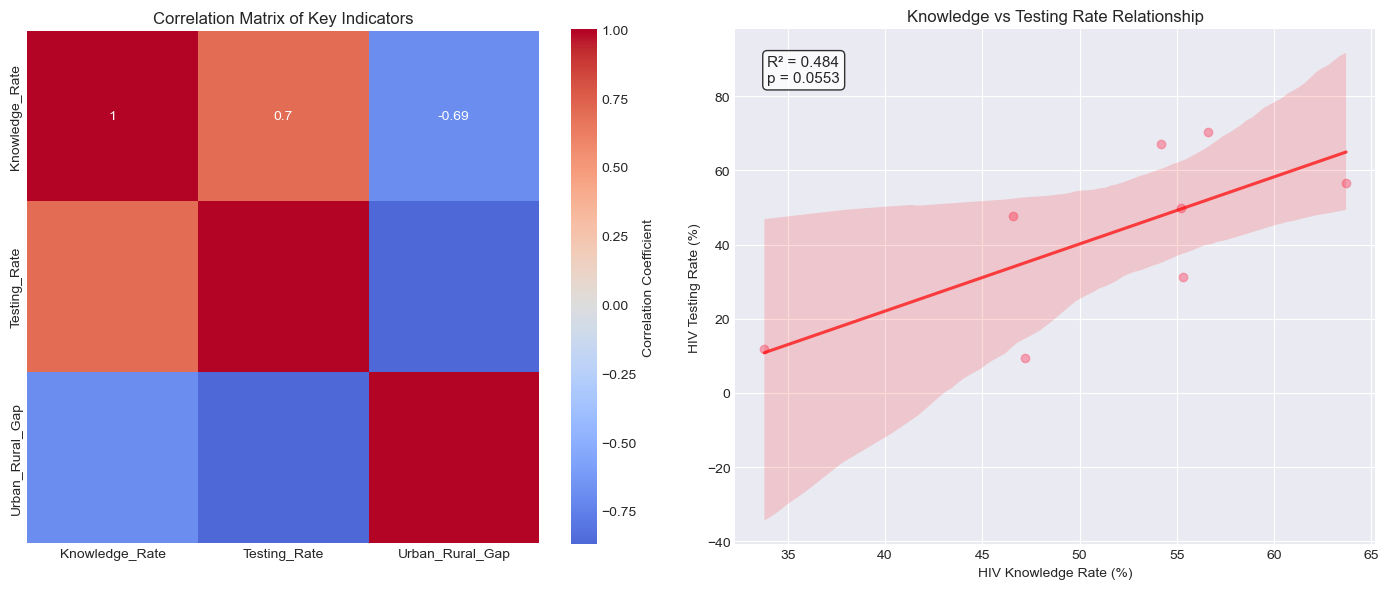


KEY ANALYTICAL INSIGHTS

1. PROGRESS ASSESSMENT (2003-2022):
• Female HIV knowledge: 37.5% (2003) → 51.3% (2022)
• Male HIV knowledge: 50.5% (2003) → 52.9% (2022)

2. GENDER DISPARITIES:
• Persistent gender gap: Males average 7.2 percentage points higher knowledge

3. HIGHEST RISK GROUPS (2022):
  • No education (15-24): 13.3% HIV knowledge

4. HIV TESTING GAPS:
  Available years in testing data: [2003, 2009, 2014, 2022]
  Latest year with testing data: 2022
• Female testing rate (2022): 79.3%
• Knowledge-Action Gap (2014): 9.0 percentage points

5. EDUCATION DISPARITY:
• 56.1pp gap between highest and lowest education levels (2022)

DATA EXPORT AND SUMMARY
✓ Analysis completed successfully!
✓ Results saved to: hiv_analysis_results.xlsx
✓ Visualizations saved as PNG files

Key visualizations generated:
  1. hiv_knowledge_trends.png
  2. hiv_testing_analysis.png
  3. equity_analysis.png
  4. correlation_analysis.png


In [1]:
# ===================================================================================
# DATA ANALYSIS FOR HIV PREVENTION IN DATA ANALYSIS FOR HIV PREVENTION IN ADOLESCENTS
# ===================================================================================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# =============================================================================
# 1. DATA LOADING AND PREPARATION
# =============================================================================

print("="*80)
print("DATA ANALYSIS FOR HIV PREVENTION IN KENYAN ADOLESCENTS")
print("="*80)

# Load dataset
df = pd.read_excel('HIV_Prevention_Adolescents.xlsx')
print(f"Dataset loaded successfully")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
df['Year'] = df['Year'].astype(int)

# Data quality assessment
print("\n=== DATA QUALITY ASSESSMENT ===")
print(f"Missing values per column:")
print(df.isnull().sum())

# Filter key indicators
knowledge_data = df[df['Indicator'].str.contains('comprehensive, correct knowledge')].copy()
testing_data = df[df['Indicator'].str.contains('tested for HIV and received')].copy()
knowledge_of_testing_data = df[df['Indicator'].str.contains('know a place')].copy()

print(f"\nIndicator breakdown:")
print(f"• Comprehensive knowledge records: {len(knowledge_data)}")
print(f"• HIV testing records: {len(testing_data)}")
print(f"• Testing site knowledge records: {len(knowledge_of_testing_data)}")

# =============================================================================
# 2. COMPREHENSIVE KNOWLEDGE ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("COMPREHENSIVE HIV KNOWLEDGE ANALYSIS")
print("="*80)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comprehensive HIV Knowledge Among Kenyan Youth (15-24)', fontsize=16, fontweight='bold')

# Trend by Year and Sex
year_sex_trend = knowledge_data.groupby(['Year', 'Sex', 'Age'])['Value'].mean().unstack().unstack()
year_sex_trend.plot(kind='line', marker='o', ax=axes[0,0])
axes[0,0].set_title('Knowledge Trends by Year, Sex, and Age Group')
axes[0,0].set_ylabel('Percentage (%)')
axes[0,0].legend(title='Group')
axes[0,0].grid(True, alpha=0.3)

# Knowledge by Education Level (2022)
edu_data_2022 = knowledge_data[(knowledge_data['Year'] == 2022) & 
                               (knowledge_data['DISAGG_CATEGORY'] == 'education')]
if not edu_data_2022.empty:
    edu_pivot = edu_data_2022.pivot_table(index='DISAGG', columns='Sex', values='Value')
    edu_pivot.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('HIV Knowledge by Education Level (2022)')
    axes[0,1].set_ylabel('Percentage (%)')
    axes[0,1].tick_params(axis='x', rotation=45)

# Urban-Rural Disparities
residence_data = knowledge_data[knowledge_data['DISAGG_CATEGORY'] == 'residence']
residence_pivot = residence_data.pivot_table(index=['Year', 'DISAGG'], columns='Sex', 
                                            values='Value').reset_index()
sns.barplot(data=residence_pivot, x='Year', y='Female', hue='DISAGG', ax=axes[1,0])
axes[1,0].set_title('Female HIV Knowledge: Urban vs Rural')
axes[1,0].set_ylabel('Percentage (%)')

# Wealth Quintile Analysis (2014)
wealth_data = knowledge_data[(knowledge_data['Year'] == 2014) & 
                             (knowledge_data['DISAGG_CATEGORY'] == 'wealth quintile')]
if not wealth_data.empty:
    wealth_pivot = wealth_data.pivot_table(index='DISAGG', columns='Sex', values='Value')
    wealth_pivot.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('HIV Knowledge by Wealth Quintile (2014)')
    axes[1,1].set_ylabel('Percentage (%)')
    axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('hiv_knowledge_trends.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 3. HIV TESTING BEHAVIOR ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("HIV TESTING BEHAVIOR ANALYSIS")
print("="*80)

# Create comprehensive testing analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('HIV Testing Behaviors Among Kenyan Youth', fontsize=16, fontweight='bold')

# Testing Trends Over Time
testing_trend = testing_data.groupby(['Year', 'Sex', 'Age'])['Value'].mean().unstack().unstack()
testing_trend.plot(kind='line', marker='s', ax=axes[0,0])
axes[0,0].set_title('HIV Testing Trends by Year, Sex, and Age')
axes[0,0].set_ylabel('Percentage Tested (%)')
axes[0,0].grid(True, alpha=0.3)

# Testing by Marital Status (2022)
marital_testing = testing_data[(testing_data['Year'] == 2022) & 
                               (testing_data['DISAGG_CATEGORY'] == 'marital status')]
if not marital_testing.empty:
    marital_pivot = marital_testing.pivot_table(index='DISAGG', columns='Sex', 
                                               values='Value').sort_values('Female', ascending=False)
    marital_pivot.head(8).plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('HIV Testing by Marital Status (2022)')
    axes[0,1].set_ylabel('Percentage (%)')
    axes[0,1].tick_params(axis='x', rotation=45)

# Knowledge of Testing Sites
knowledge_trend = knowledge_of_testing_data.groupby(['Year', 'Sex', 'Age'])['Value'].mean().unstack().unstack()
knowledge_trend.plot(kind='line', marker='^', ax=axes[1,0])
axes[1,0].set_title('Knowledge of HIV Testing Sites')
axes[1,0].set_ylabel('Percentage (%)')
axes[1,0].grid(True, alpha=0.3)

# Testing Gap Analysis (Knowledge vs Action)
knowledge_action = pd.merge(
    knowledge_of_testing_data.groupby(['Year', 'Sex'])['Value'].mean().reset_index(),
    testing_data.groupby(['Year', 'Sex'])['Value'].mean().reset_index(),
    on=['Year', 'Sex'],
    suffixes=('_knowledge', '_tested')
)
knowledge_action['gap'] = knowledge_action['Value_knowledge'] - knowledge_action['Value_tested']

sns.lineplot(data=knowledge_action, x='Year', y='gap', hue='Sex', marker='o', ax=axes[1,1])
axes[1,1].set_title('Knowledge-Action Gap in HIV Testing')
axes[1,1].set_ylabel('Percentage Point Gap')
axes[1,1].axhline(y=0, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('hiv_testing_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 4. EQUITY AND DISPARITY ANALYSIS - CORRECTED VERSION
# =============================================================================

print("\n" + "="*80)
print("EQUITY ANALYSIS ACROSS DIMENSIONS")
print("="*80)

# Analyze disparities across multiple dimensions
dimensions = ['education', 'residence', 'wealth quintile', 'marital status']
disparity_results = {}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Equity Analysis: HIV Knowledge Disparities', fontsize=16, fontweight='bold')

for idx, dim in enumerate(dimensions):
    ax = axes[idx//2, idx%2]
    
    # Try to get data for 2022 first
    dim_data_2022 = knowledge_data[(knowledge_data['Year'] == 2022) & 
                                  (knowledge_data['DISAGG_CATEGORY'] == dim)]
    
    # If no 2022 data, use the most recent year with data for this dimension
    if dim_data_2022.empty:
        # Find years with data for this dimension
        available_years = knowledge_data[knowledge_data['DISAGG_CATEGORY'] == dim]['Year'].unique()
        if len(available_years) > 0:
            latest_year = max(available_years)
            dim_data = knowledge_data[(knowledge_data['Year'] == latest_year) & 
                                      (knowledge_data['DISAGG_CATEGORY'] == dim)]
            year_label = f"{latest_year}"
        else:
            dim_data = pd.DataFrame()  # Empty dataframe
            year_label = "No Data"
    else:
        dim_data = dim_data_2022
        year_label = "2022"
    
    if not dim_data.empty:
        # Get unique DISAGG values
        disaggregations = dim_data['DISAGG'].unique()
        
        # Create pivot table - handle case where some groups might be missing
        pivot_data = []
        for disagg in disaggregations:
            for sex in ['Female', 'Male']:
                value = dim_data[(dim_data['DISAGG'] == disagg) & 
                                (dim_data['Sex'] == sex)]['Value'].mean()
                if not pd.isna(value):
                    pivot_data.append({
                        'DISAGG': disagg,
                        'Sex': sex,
                        'Value': value
                    })
        
        if pivot_data:
            pivot_df = pd.DataFrame(pivot_data)
            pivot_table = pivot_df.pivot_table(index='DISAGG', columns='Sex', 
                                              values='Value')
            
            # Check if both Female and Male columns exist
            if 'Female' in pivot_table.columns and 'Male' in pivot_table.columns:
                # Sort by Female values
                pivot_table = pivot_table.sort_values('Female', ascending=False)
                
                # Plot
                pivot_table.plot(kind='bar', ax=ax, width=0.8)
                ax.set_title(f'{dim.title()} Disparities ({year_label})')
                ax.set_ylabel('HIV Knowledge (%)')
                ax.tick_params(axis='x', rotation=45)
                
                # Calculate disparity metrics
                female_range = pivot_table['Female'].max() - pivot_table['Female'].min()
                male_range = pivot_table['Male'].max() - pivot_table['Male'].min()
                
                ax.annotate(f'ΔF: {female_range:.1f}pp\nΔM: {male_range:.1f}pp', 
                           xy=(0.02, 0.98), xycoords='axes fraction',
                           fontsize=9, ha='left', va='top',
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
            else:
                ax.text(0.5, 0.5, f'Incomplete data\nfor {dim}', 
                        horizontalalignment='center', verticalalignment='center',
                        transform=ax.transAxes, fontsize=11)
                ax.set_title(f'{dim.title()} Disparities')
        else:
            ax.text(0.5, 0.5, f'No data available\nfor {dim}', 
                    horizontalalignment='center', verticalalignment='center',
                    transform=ax.transAxes, fontsize=11)
            ax.set_title(f'{dim.title()} Disparities')
    else:
        ax.text(0.5, 0.5, f'No data available\nfor {dim}', 
                horizontalalignment='center', verticalalignment='center',
                transform=ax.transAxes, fontsize=11)
        ax.set_title(f'{dim.title()} Disparities')

plt.tight_layout()
plt.savefig('equity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 5. CORRELATION AND PREDICTIVE ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("CORRELATION AND PREDICTIVE ANALYSIS")
print("="*80)

# Create correlation matrix for key variables
corr_data = pd.DataFrame()

# Extract key metrics by group
for year in df['Year'].unique():
    for sex in ['Female', 'Male']:
        # Knowledge metrics
        knowledge_15_24 = knowledge_data[(knowledge_data['Year'] == year) & 
                                         (knowledge_data['Sex'] == sex) &
                                         (knowledge_data['Age'] == '15-24') &
                                         (knowledge_data['DISAGG_CATEGORY'] == 'total')]['Value'].mean()
        
        # Testing metrics
        testing_15_24 = testing_data[(testing_data['Year'] == year) & 
                                     (testing_data['Sex'] == sex) &
                                     (testing_data['Age'] == '15-24') &
                                     (testing_data['DISAGG_CATEGORY'] == 'age')]['Value'].mean()
        
        # Urban-rural gap
        urban_knowledge = knowledge_data[(knowledge_data['Year'] == year) & 
                                         (knowledge_data['Sex'] == sex) &
                                         (knowledge_data['DISAGG_CATEGORY'] == 'residence') &
                                         (knowledge_data['DISAGG'] == 'Urban')]['Value'].mean()
        rural_knowledge = knowledge_data[(knowledge_data['Year'] == year) & 
                                         (knowledge_data['Sex'] == sex) &
                                         (knowledge_data['DISAGG_CATEGORY'] == 'residence') &
                                         (knowledge_data['DISAGG'] == 'Rural')]['Value'].mean()
        
        corr_data = pd.concat([corr_data, pd.DataFrame({
            'Year': [year],
            'Sex': [sex],
            'Knowledge_Rate': [knowledge_15_24],
            'Testing_Rate': [testing_15_24],
            'Urban_Rural_Gap': [urban_knowledge - rural_knowledge]
        })])

# Calculate correlations
correlation_matrix = corr_data[['Knowledge_Rate', 'Testing_Rate', 'Urban_Rural_Gap']].corr()

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0], cbar_kws={'label': 'Correlation Coefficient'})
axes[0].set_title('Correlation Matrix of Key Indicators')

# Scatter plot with regression
sns.regplot(data=corr_data, x='Knowledge_Rate', y='Testing_Rate', 
           scatter_kws={'alpha':0.6}, line_kws={'color':'red', 'alpha':0.7}, ax=axes[1])
axes[1].set_title('Knowledge vs Testing Rate Relationship')
axes[1].set_xlabel('HIV Knowledge Rate (%)')
axes[1].set_ylabel('HIV Testing Rate (%)')

# Calculate and display R-squared
slope, intercept, r_value, p_value, std_err = stats.linregress(
    corr_data['Knowledge_Rate'].dropna(), 
    corr_data['Testing_Rate'].dropna()
)
axes[1].annotate(f'R² = {r_value**2:.3f}\np = {p_value:.4f}', 
                xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=11, ha='left', va='top',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 6. KEY INSIGHTS GENERATION - CORRECTED VERSION
# =============================================================================

print("\n" + "="*80)
print("KEY ANALYTICAL INSIGHTS")
print("="*80)

# Insight 1: Progress Assessment
knowledge_growth = knowledge_data.groupby(['Year', 'Sex'])['Value'].mean().unstack()
print("\n1. PROGRESS ASSESSMENT (2003-2022):")
print(f"• Female HIV knowledge: {knowledge_growth['Female'].iloc[0]:.1f}% (2003) → {knowledge_growth['Female'].iloc[-1]:.1f}% (2022)")
print(f"• Male HIV knowledge: {knowledge_growth['Male'].iloc[0]:.1f}% (2003) → {knowledge_growth['Male'].iloc[-1]:.1f}% (2022)")

# Insight 2: Gender Disparities
print(f"\n2. GENDER DISPARITIES:")

# Alternative approach: Calculate gender gap using pivot tables
gender_comparison = knowledge_data.groupby(['Year', 'Sex'])['Value'].mean().reset_index()
gender_pivot = gender_comparison.pivot(index='Year', columns='Sex', values='Value')

# Calculate average gap across all years
avg_gender_gap = (gender_pivot['Male'] - gender_pivot['Female']).mean()
print(f"• Persistent gender gap: Males average {avg_gender_gap:.1f} percentage points higher knowledge")

# Insight 3: Critical Vulnerabilities
print("\n3. HIGHEST RISK GROUPS (2022):")
high_risk_groups = knowledge_data[
    (knowledge_data['Year'] == 2022) & 
    (knowledge_data['Sex'] == 'Female') &
    (knowledge_data['Value'] < 30)
].sort_values('Value').head(3)

if not high_risk_groups.empty:
    for _, row in high_risk_groups.iterrows():
        print(f"  • {row['DISAGG']} ({row['Age']}): {row['Value']:.1f}% HIV knowledge")
else:
    print("  • No groups with HIV knowledge below 30% in 2022")

# Insight 4: Testing Gaps
print("\n4. HIV TESTING GAPS:")

# Check what years are available in testing_data
print(f"  Available years in testing data: {sorted(testing_data['Year'].unique())}")

# Use a safer approach to get the most recent year's data
testing_by_year_sex = testing_data.groupby(['Year', 'Sex'])['Value'].mean().reset_index()

# Find the most recent year with testing data
latest_testing_year = testing_by_year_sex['Year'].max()
print(f"  Latest year with testing data: {latest_testing_year}")

# Get female testing rate for the latest year
female_testing_latest = testing_by_year_sex[
    (testing_by_year_sex['Year'] == latest_testing_year) & 
    (testing_by_year_sex['Sex'] == 'Female')
]['Value'].values

if len(female_testing_latest) > 0:
    print(f"• Female testing rate ({latest_testing_year}): {female_testing_latest[0]:.1f}%")
else:
    print(f"• Female testing rate data not available for {latest_testing_year}")

# Calculate knowledge-action gap using the most recent common year
common_years = set(knowledge_of_testing_data['Year'].unique()) & set(testing_data['Year'].unique())
if common_years:
    latest_common_year = max(common_years)
    knowledge_rate = knowledge_of_testing_data[
        (knowledge_of_testing_data['Year'] == latest_common_year) &
        (knowledge_of_testing_data['Sex'] == 'Female')
    ]['Value'].mean()
    
    testing_rate = testing_data[
        (testing_data['Year'] == latest_common_year) &
        (testing_data['Sex'] == 'Female')
    ]['Value'].mean()
    
    gap = knowledge_rate - testing_rate
    print(f"• Knowledge-Action Gap ({latest_common_year}): {gap:.1f} percentage points")

# Insight 5: Education Disparity
print("\n5. EDUCATION DISPARITY:")

# Check if 2022 data exists for education
edu_2022_data = knowledge_data[
    (knowledge_data['Year'] == 2022) & 
    (knowledge_data['DISAGG_CATEGORY'] == 'education') &
    (knowledge_data['Sex'] == 'Female')
]

if not edu_2022_data.empty:
    edu_disparity = edu_2022_data.pivot_table(index='DISAGG', values='Value')
    edu_range = edu_disparity.max() - edu_disparity.min()
    print(f"• {edu_range.iloc[0]:.1f}pp gap between highest and lowest education levels (2022)")
else:
    # Try to find the most recent year with education data
    edu_years = knowledge_data[
        (knowledge_data['DISAGG_CATEGORY'] == 'education') &
        (knowledge_data['Sex'] == 'Female')
    ]['Year'].unique()
    
    if len(edu_years) > 0:
        latest_edu_year = max(edu_years)
        edu_data = knowledge_data[
            (knowledge_data['Year'] == latest_edu_year) & 
            (knowledge_data['DISAGG_CATEGORY'] == 'education') &
            (knowledge_data['Sex'] == 'Female')
        ]
        edu_disparity = edu_data.pivot_table(index='DISAGG', values='Value')
        edu_range = edu_disparity.max() - edu_disparity.min()
        print(f"• {edu_range.iloc[0]:.1f}pp gap between highest and lowest education levels ({latest_edu_year})")
    else:
        print("• Education disparity data not available")

# =============================================================================
# 7. DATA EXPORT AND SUMMARY
# =============================================================================

print("\n" + "="*80)
print("DATA EXPORT AND SUMMARY")
print("="*80)

# Create summary statistics table
summary_stats = pd.DataFrame({
    'Indicator': [
        'Comprehensive HIV Knowledge (15-24)',
        'HIV Testing Rate (15-24)',
        'Knowledge of Testing Sites',
        'Education Disparity (Range)',
        'Urban-Rural Gap'
    ],
    '2003_Female': [
        knowledge_data[(knowledge_data['Year']==2003) & (knowledge_data['Sex']=='Female') & 
                      (knowledge_data['Age']=='15-24') & (knowledge_data['DISAGG_CATEGORY']=='total')]['Value'].mean(),
        testing_data[(testing_data['Year']==2003) & (testing_data['Sex']=='Female') & 
                    (testing_data['Age']=='15-24') & (testing_data['DISAGG_CATEGORY']=='age')]['Value'].mean(),
        knowledge_of_testing_data[(knowledge_of_testing_data['Year']==2003) & 
                                 (knowledge_of_testing_data['Sex']=='Female') & 
                                 (knowledge_of_testing_data['Age']=='15-24')]['Value'].mean(),
        np.nan,
        np.nan
    ],
    '2022_Female': [
        knowledge_data[(knowledge_data['Year']==2022) & (knowledge_data['Sex']=='Female') & 
                      (knowledge_data['Age']=='15-24') & (knowledge_data['DISAGG_CATEGORY']=='total')]['Value'].mean(),
        testing_data[(testing_data['Year']==2022) & (testing_data['Sex']=='Female') & 
                    (testing_data['Age']=='15-24') & (testing_data['DISAGG_CATEGORY']=='age')]['Value'].mean(),
        knowledge_of_testing_data[(knowledge_of_testing_data['Year']==2022) & 
                                 (knowledge_of_testing_data['Sex']=='Female') & 
                                 (knowledge_of_testing_data['Age']=='15-24')]['Value'].mean(),
        np.nan,
        np.nan
    ]
})

# Calculate progress percentages
for i in range(3):
    start = summary_stats.loc[i, '2003_Female']
    end = summary_stats.loc[i, '2022_Female']
    if not np.isnan(start) and not np.isnan(end) and start > 0:
        progress = ((end - start) / start) * 100
        summary_stats.loc[i, 'Progress_Percentage'] = progress

# Save to Excel
with pd.ExcelWriter('hiv_analysis_results.xlsx') as writer:
    summary_stats.to_excel(writer, sheet_name='Summary_Statistics', index=False)
    corr_data.to_excel(writer, sheet_name='Correlation_Data', index=False)
    
    # Save pivot tables
    knowledge_pivot = knowledge_data.pivot_table(
        index=['Year', 'Sex', 'Age'], 
        columns='DISAGG_CATEGORY', 
        values='Value', 
        aggfunc='mean'
    ).reset_index()
    knowledge_pivot.to_excel(writer, sheet_name='Knowledge_Pivot', index=False)
    
    testing_pivot = testing_data.pivot_table(
        index=['Year', 'Sex', 'Age'],
        columns='DISAGG_CATEGORY',
        values='Value',
        aggfunc='mean'
    ).reset_index()
    testing_pivot.to_excel(writer, sheet_name='Testing_Pivot', index=False)

print("✓ Analysis completed successfully!")
print(f"✓ Results saved to: hiv_analysis_results.xlsx")
print(f"✓ Visualizations saved as PNG files")
print(f"\nKey visualizations generated:")
print(f"  1. hiv_knowledge_trends.png")
print(f"  2. hiv_testing_analysis.png")
print(f"  3. equity_analysis.png")
print(f"  4. correlation_analysis.png")

# =============================================================================
# END OF ANALYSIS
# =============================================================================